# Data Loading

In [1]:
#importing the libraries
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the file from github
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/heartdisease_data.csv",names=range(1,15),header=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [3]:
df.rename(columns = {1:'Age',2:'sex',3:'cp',4:'trestbps',5:'chol',6:'fbs',7:'restecg',8:'thalach',9:'exang',10:'oldpeak',11:'slope',12:'ca',13:'thal',14:'num'}, inplace = True)

In [4]:
df

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       199 non-null    int64 
 1   sex       199 non-null    int64 
 2   cp        199 non-null    int64 
 3   trestbps  199 non-null    object
 4   chol      199 non-null    object
 5   fbs       199 non-null    object
 6   restecg   199 non-null    int64 
 7   thalach   199 non-null    object
 8   exang     199 non-null    object
 9   oldpeak   199 non-null    object
 10  slope     199 non-null    object
 11  ca        199 non-null    object
 12  thal      199 non-null    object
 13  num       199 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 21.9+ KB


In [6]:
df.dtypes
#describes which column is of which data type

Age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [7]:
#checking unique value for every column
df.apply(lambda x: len(x.unique()))

Age          39
sex           2
cp            4
trestbps     41
chol        100
fbs           3
restecg       3
thalach      60
exang         3
oldpeak      15
slope         4
ca            2
thal          4
num           5
dtype: int64

In [8]:
df.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [10]:
df= df.replace("?", np.nan)

In [11]:
df.isnull().sum()

Age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
num           0
dtype: int64

In [12]:
df.isnull()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False,False,False,False,True,True,True,False
195,False,False,False,True,False,False,False,True,True,True,True,True,True,False
196,False,False,False,False,False,False,False,False,False,False,True,True,False,False
197,False,False,False,True,False,False,False,True,True,True,True,True,True,False


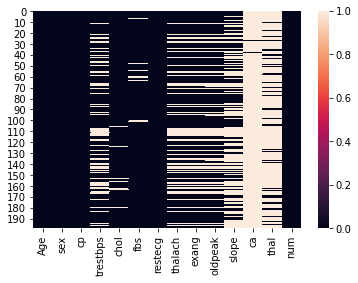

In [13]:
sns.heatmap(df.isnull())

In [14]:
#replacing nan values with mode of the column because it is categorical data
for col in['fbs','exang','slope','num','thal']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [15]:
#now replacing the nan value in rest of the columns with zero so that i can change it's datatype from object to int or float.
df= df.replace(np.nan,0)

In [16]:
df["trestbps"]=df["trestbps"].astype("int")

In [17]:
df["chol"]=df["chol"].astype("int")

In [18]:
df["thalach"]=df["thalach"].astype("int")

In [19]:
df["oldpeak"]=df["oldpeak"].astype("float")

In [20]:
df["slope"]=df["slope"].astype("int")

In [21]:
df

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0.0,2,0,7,0
1,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
2,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0.0,2,0,7,1
195,62,1,1,0,139,0,1,0,1,0.0,2,0,7,0
196,55,1,4,122,223,1,1,100,0,0.0,2,0,6,2
197,58,1,4,0,385,1,2,0,1,0.0,2,0,7,0


In [22]:

median_trestbps = df['trestbps'].median(skipna=True)
print(median_trestbps)

122.0


In [23]:
df['trestbps']=df.trestbps.mask(df.trestbps == 0,median_trestbps)


In [24]:
median_chol = df['chol'].median(skipna=True)
print(median_chol)

214.0


In [25]:
df['chol']=df.chol.mask(df.chol == 0,median_chol)


In [26]:
median_thalach = df['thalach'].median(skipna=True)
print(median_thalach)

111.0


In [27]:
df['thalach']=df.thalach.mask(df.thalach == 0,median_thalach)


In [28]:
median_oldpeak = df['oldpeak'].median(skipna=True)
print(median_oldpeak)

0.5


In [29]:
df['oldpeak']=df.oldpeak.mask(df.oldpeak == 0,median_oldpeak)


In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)


     Age  sex  cp  trestbps  chol fbs  restecg  thalach exang  oldpeak  slope  \
0     44    1   4       130   209   0        1      127     0      0.5      2   
1     60    1   4       132   218   0        1      140     1      1.5      3   
2     55    1   4       142   228   0        1      149     1      2.5      1   
3     66    1   3       110   213   1        2       99     1      1.3      2   
4     66    1   3       120   214   0        1      120     0     -0.5      1   
5     65    1   4       150   236   1        1      105     1      0.5      2   
6     60    1   3       180   214   0        1      140     1      1.5      2   
7     60    1   3       120   214   0        0      141     1      2.0      1   
8     60    1   2       160   267   1        1      157     0      0.5      2   
9     56    1   2       126   166   0        1      140     0      0.5      2   
10    59    1   4       140   214   0        1      117     1      1.0      2   
11    62    1   4       110 

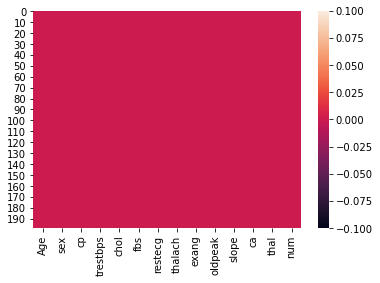

In [31]:
sns.heatmap(df.isnull())

# Univariate Analysis

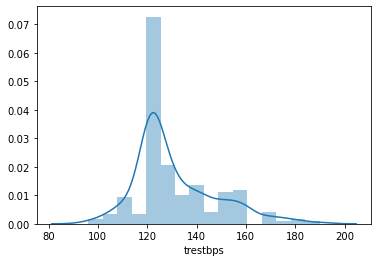

In [32]:
sns.distplot(df["trestbps"])

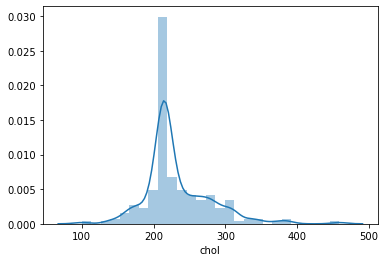

In [33]:

sns.distplot(df["chol"])

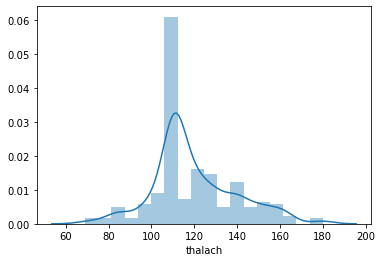

In [34]:

sns.distplot(df["thalach"])

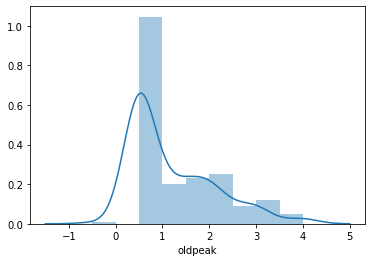

In [35]:

sns.distplot(df["oldpeak"])

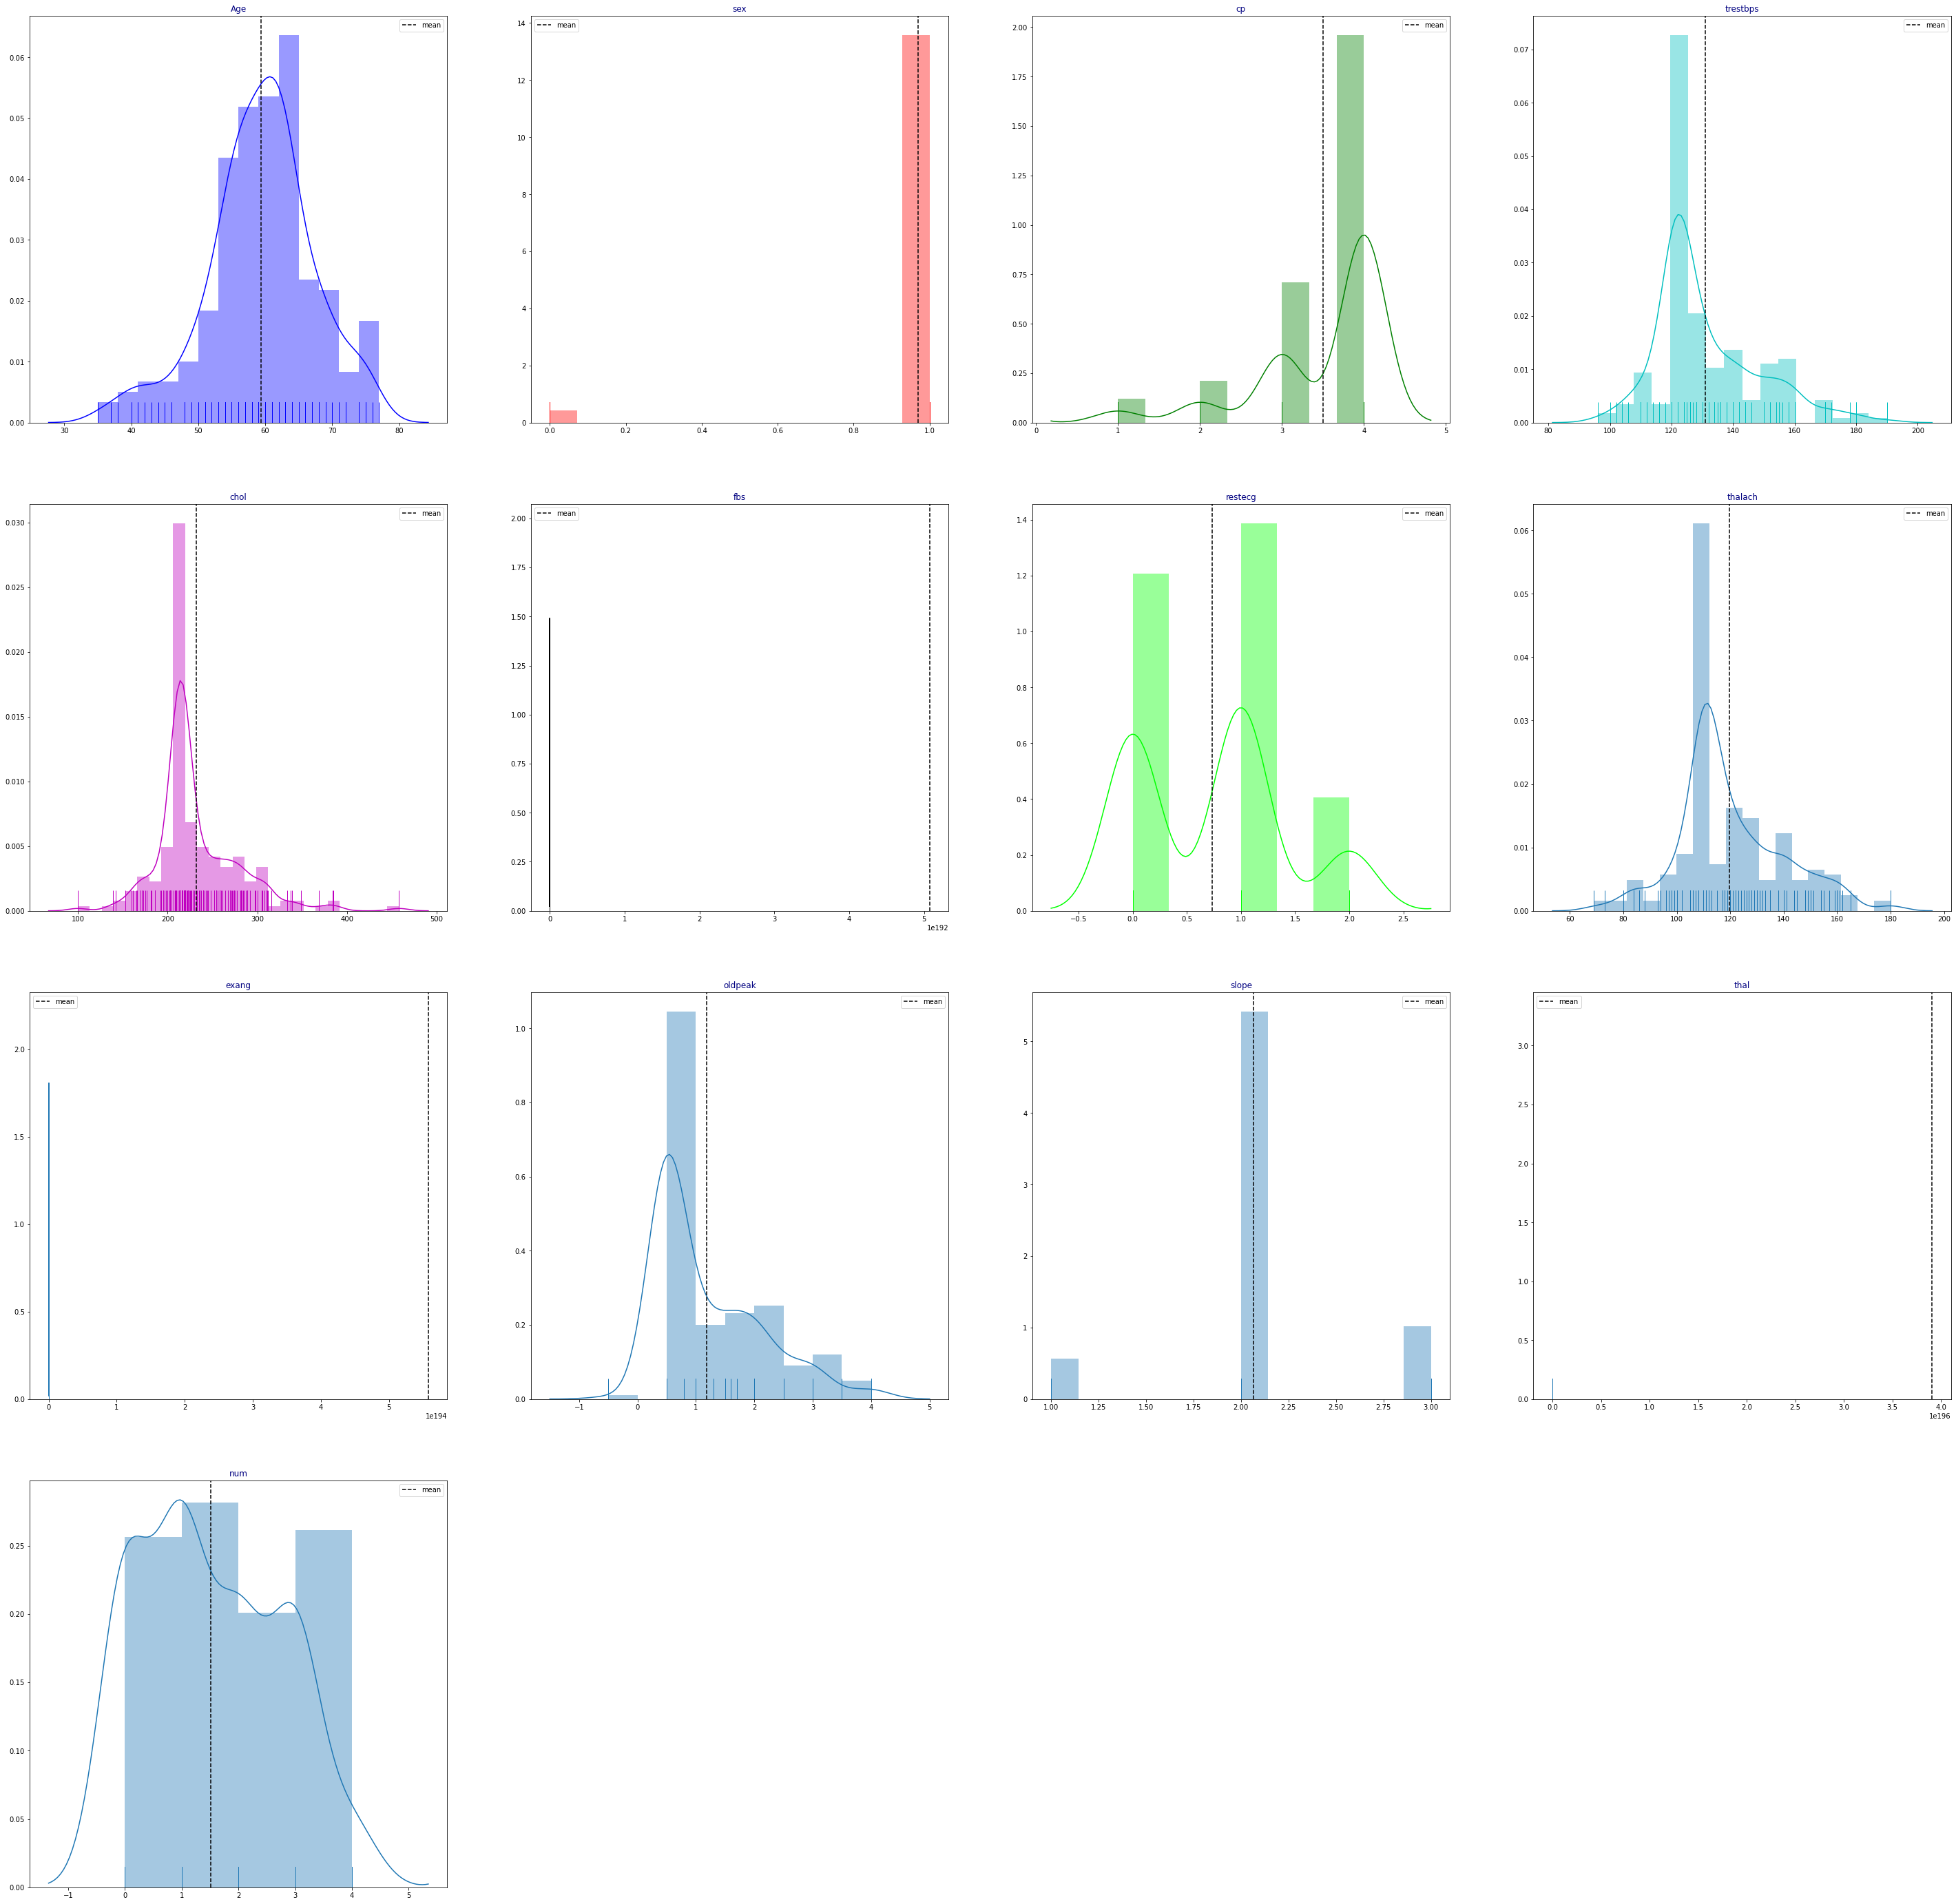

In [36]:
#code to observe the skewness in every column.
import itertools
cols=['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope',  'thal', 'num' ]
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(50,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,4,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Bivariate Analysis

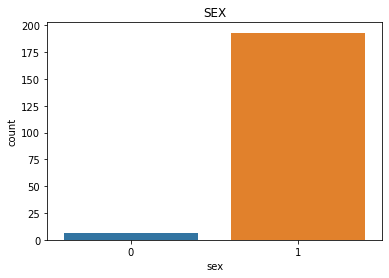

In [37]:
sns.countplot(df["sex"])
plt.title('SEX')
plt.show()

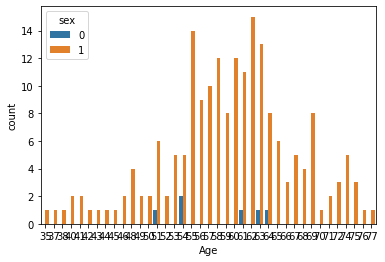

<Figure size 360x1080 with 0 Axes>

In [38]:
sns.countplot(x="Age",hue="sex",data=df)
plt.figure(figsize=(5,15))
plt.show()

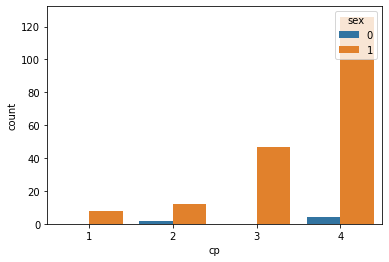

<Figure size 360x1080 with 0 Axes>

In [39]:
sns.countplot(x="cp",hue="sex",data=df)
plt.figure(figsize=(5,15))
plt.show()

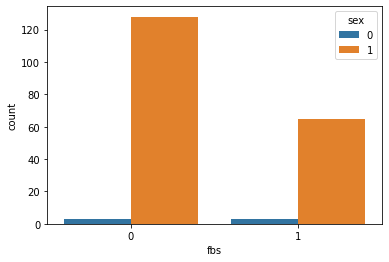

<Figure size 360x1080 with 0 Axes>

In [40]:
sns.countplot(x="fbs",hue="sex",data=df)
plt.figure(figsize=(5,15))
plt.show()

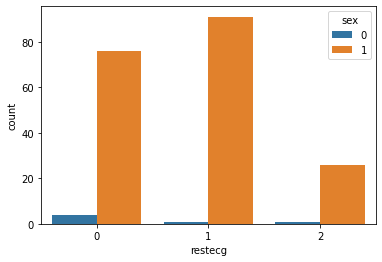

<Figure size 360x1080 with 0 Axes>

In [41]:
sns.countplot(x="restecg",hue="sex",data=df)
plt.figure(figsize=(5,15))
plt.show()

<Figure size 1080x3960 with 0 Axes>

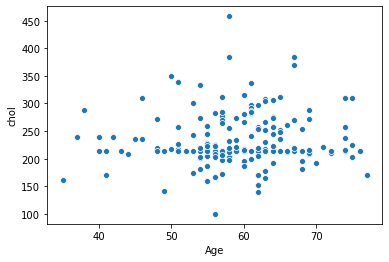

<Figure size 1080x3960 with 0 Axes>

In [42]:
sns.scatterplot(x="Age",y='chol',data=df)
plt.figure(figsize=(15,55))

<Figure size 1080x3960 with 0 Axes>

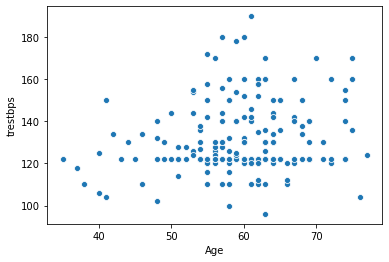

<Figure size 1080x3960 with 0 Axes>

In [43]:
sns.scatterplot(x="Age",y='trestbps',data=df)
plt.figure(figsize=(15,55))

<Figure size 1080x3960 with 0 Axes>

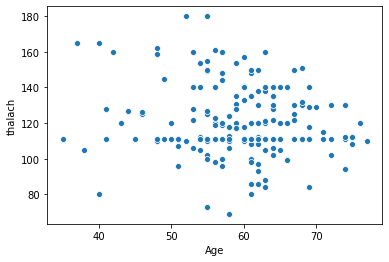

<Figure size 1080x3960 with 0 Axes>

In [44]:
sns.scatterplot(x="Age",y='thalach',data=df)
plt.figure(figsize=(15,55))

# Multivariate Analysis

In [45]:
df.corr()

,Age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,num
Age,1.000000,0.033837,-0.039809,0.173736,0.051519,0.001487,-0.145832,0.141417,0.107525,0.286630
sex,0.033837,1.000000,0.037525,0.005686,-0.165108,0.060305,-0.011655,0.067860,0.086842,0.147190
cp,-0.039809,0.037525,1.000000,0.125503,0.113913,0.033617,-0.057869,0.157806,0.059955,0.167202
trestbps,0.173736,0.005686,0.125503,1.000000,0.034915,0.050908,0.142365,0.266399,0.107061,0.214714
chol,0.051519,-0.165108,0.113913,0.034915,1.000000,-0.034673,-0.045715,-0.028716,0.043325,0.106183
restecg,0.001487,0.060305,0.033617,0.050908,-0.034673,1.000000,0.003596,-0.119048,-0.039628,-0.033597
thalach,-0.145832,-0.011655,-0.057869,0.142365,-0.045715,0.003596,1.000000,0.229870,-0.081476,-0.051691
oldpeak,0.141417,0.067860,0.157806,0.266399,-0.028716,-0.119048,0.229870,1.000000,0.324349,0.400840
slope,0.107525,0.086842,0.059955,0.107061,0.043325,-0.039628,-0.081476,0.324349,1.000000,0.142409
num,0.286630,0.147190,0.167202,0.214714,0.106183,-0.033597,-0.051691,0.400840,0.142409,1.000000


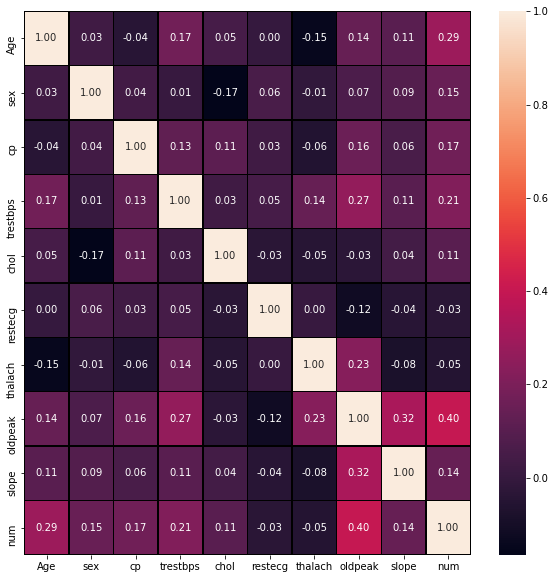

In [46]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [48]:
df["exang"]=df["exang"].astype("int")

In [49]:
df["fbs"]=df["fbs"].astype("int")

In [50]:
df["thal"]=df["thal"].astype("int")

In [51]:
df.drop(['ca',],axis=1,inplace=True)

In [52]:
df.dtypes

Age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int32
restecg       int64
thalach       int64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object

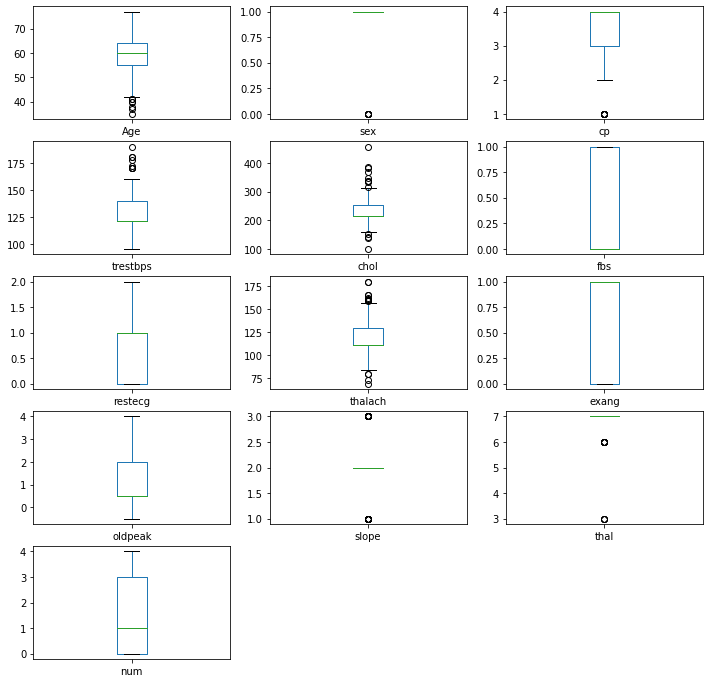

In [53]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [54]:
collist=df.columns.values
ncol=14
nrows=10

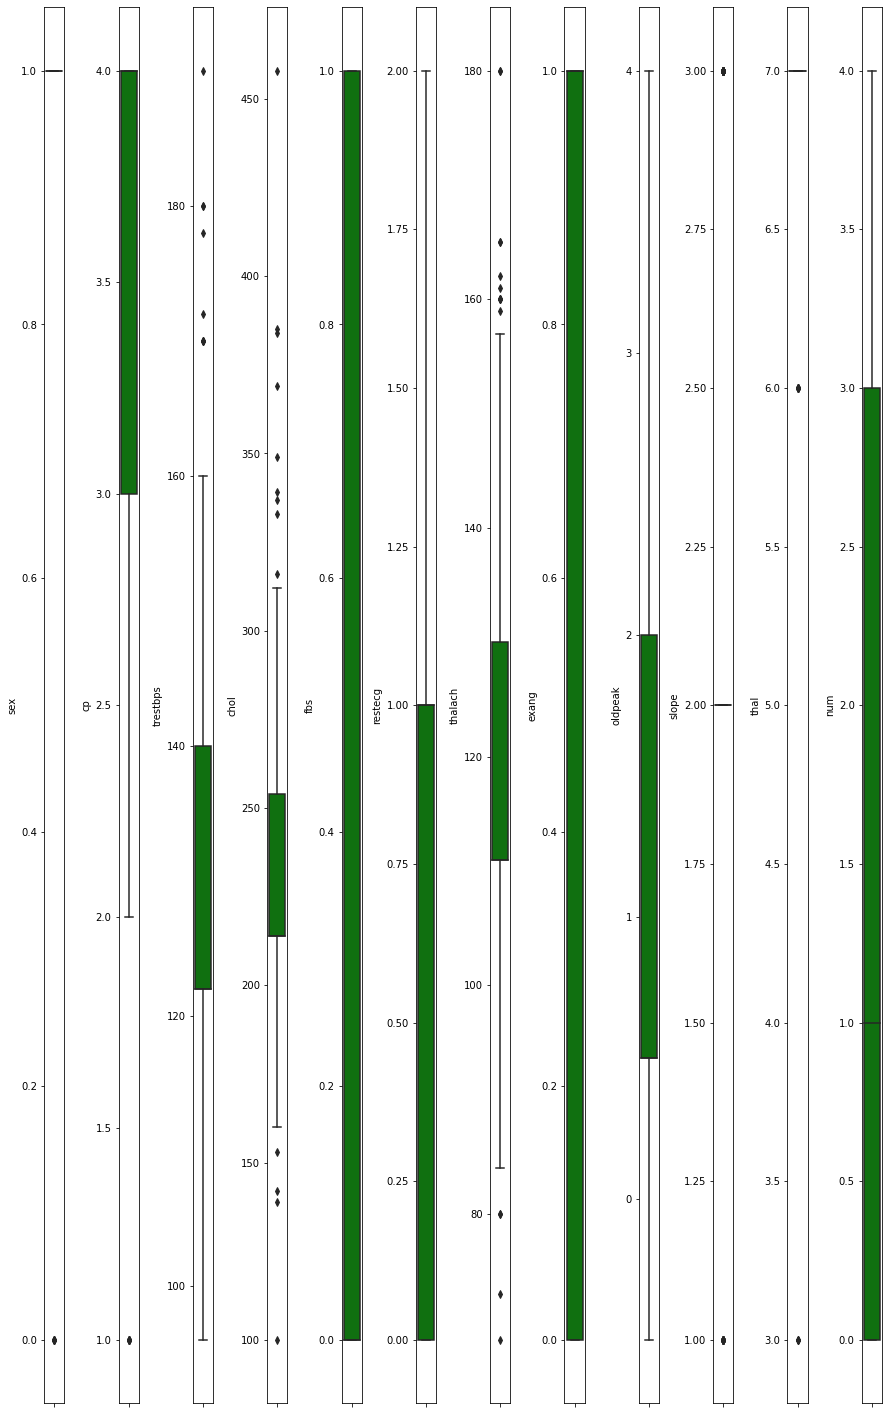

In [55]:
#code for checking the outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(ncol,14*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# There are not such outliers still we will confirm with Z-score

In [56]:
#removing outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 0.13869083, 0.2046578 ,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 1.98434575, 0.2046578 ,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 2.26172741, 0.2046578 ,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.13869083, 1.49229649,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 0.13869083, 0.2046578 ,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 0.13869083, 0.2046578 ,
        0.42461322]])

In [57]:
#to remove outliers we need threshold +3 and -3
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 198, 198, 198], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


In [58]:
df2=df[(z<3).all(axis=1)]

In [59]:
df2

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,44,1,4,130,209,0,1,127,0,0.5,2,7,0
1,60,1,4,132,218,0,1,140,1,1.5,3,7,2
2,55,1,4,142,228,0,1,149,1,2.5,1,7,1
3,66,1,3,110,213,1,2,99,1,1.3,2,7,0
4,66,1,3,120,214,0,1,120,0,-0.5,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,62,1,4,160,254,1,1,108,1,3.0,2,7,4
191,53,1,4,144,300,1,1,128,1,1.5,2,7,3
192,62,1,4,158,170,0,1,138,1,0.5,2,7,1
196,55,1,4,122,223,1,1,100,0,0.5,2,6,2


In [60]:
percentage_loss=((199-170)/199)*100
percentage_loss

14.572864321608039

In [61]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Age          9.0
sex          0.0
cp           1.0
trestbps    18.0
chol        40.0
fbs          1.0
restecg      1.0
thalach     19.0
exang        1.0
oldpeak      1.5
slope        0.0
thal         0.0
num          3.0
dtype: float64


In [62]:
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df2.shape)

(107, 13)


# scaling

In [63]:
X=df.drop('num',axis=1)
Y=df['num']

Let's remove skewness

In [64]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [65]:
#to remove outliers we need threshold +3 and -3
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 198, 198, 198], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_to_scale=['Age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale]=sc.fit_transform(df[columns_to_scale])


In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.22,random_state=43)

In [69]:
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.2727272727272727
[[5 5 1 1 0]
 [3 5 2 5 0]
 [1 3 2 3 0]
 [1 6 0 0 0]
 [0 0 1 0 0]]
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.26      0.33      0.29        15
           2       0.33      0.22      0.27         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.27        44
   macro avg       0.22      0.19      0.20        44
weighted avg       0.29      0.27      0.28        44



In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

0.20454545454545456
[[2 4 1 3 2]
 [5 5 4 1 0]
 [1 5 1 2 0]
 [1 2 3 1 0]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.22      0.17      0.19        12
           1       0.29      0.33      0.31        15
           2       0.11      0.11      0.11         9
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         1

    accuracy                           0.20        44
   macro avg       0.15      0.15      0.15        44
weighted avg       0.21      0.20      0.20        44



In [71]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.2727272727272727
[[1 8 0 3 0]
 [1 9 1 4 0]
 [0 6 0 3 0]
 [1 4 0 2 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.33      0.60      0.43        15
           2       0.00      0.00      0.00         9
           3       0.15      0.29      0.20         7
           4       0.00      0.00      0.00         1

    accuracy                           0.27        44
   macro avg       0.16      0.19      0.15        44
weighted avg       0.23      0.27      0.21        44



In [72]:
#k=10
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
predknn=knn.predict(X_test)
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

0.22727272727272727
[[4 5 1 2 0]
 [5 5 2 3 0]
 [0 3 1 5 0]
 [2 5 0 0 0]
 [0 0 1 0 0]]
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        12
           1       0.28      0.33      0.30        15
           2       0.20      0.11      0.14         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.23        44
   macro avg       0.17      0.16      0.16        44
weighted avg       0.23      0.23      0.23        44



In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    print('Accuracy score',m,'is:')
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    

Accuracy score RandomForestClassifier() is:
0.4318181818181818
[[5 2 3 2 0]
 [3 8 2 2 0]
 [0 3 4 2 0]
 [1 4 0 2 0]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.44      0.53      0.48        15
           2       0.44      0.44      0.44         9
           3       0.25      0.29      0.27         7
           4       0.00      0.00      0.00         1

    accuracy                           0.43        44
   macro avg       0.34      0.34      0.33        44
weighted avg       0.43      0.43      0.43        44

Accuracy score AdaBoostClassifier() is:
0.29545454545454547
[[0 9 2 1 0]
 [0 7 6 2 0]
 [1 2 3 3 0]
 [1 2 2 2 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.35      0.47      0.40        15
           2       0.23      0.33      0.27         9
           3       0.25      0.29      

# Hyperparameter tuning

In [75]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [76]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [77]:
rf_Model = RandomForestClassifier()

In [78]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [79]:
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 260 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 666 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   26.7s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [80]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 56}

In [81]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.748
Test Accuracy - : 0.409
